In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
main_df = pd.read_csv('/content/main_loan_base.csv')
monthly_balance_df = pd.read_csv('/content/monthly_balance_base.csv')
repayment_df = pd.read_csv('/content/repayment_base.csv')

In [ ]:
repayment_df

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.320000,2019-05-18
1,LN79307711,667.987539,2019-06-20
2,LN79307711,1012.320000,2019-07-16
3,LN79307711,1012.320000,2019-08-16
4,LN79307711,1012.320000,2019-09-22
...,...,...,...
626596,LN74765572,3771.910000,2014-10-22
626597,LN74765572,3771.910000,2014-11-15
626598,LN46546410,21443.470000,2014-06-12
626599,LN46546410,21443.470000,2014-07-18


In [ ]:
repayment_df1= repayment_df.groupby(["loan_acc_num"]).sum(["repayment_amount"])
repayment_df1.reset_index(inplace =True)

monthly_balance_df1= monthly_balance_df.groupby(["loan_acc_num"]).mean(["balance_amount"])
monthly_balance_df1.reset_index(inplace =True)

In [ ]:
repayment_df1.head()

,loan_acc_num,repayment_amount
0,LN10000701,40020.990845
1,LN10001077,112218.467834
2,LN10004116,290634.935049
3,LN10007976,337321.715542
4,LN10010204,61290.488288


In [ ]:
data_df = main_df.merge(monthly_balance_df1, on='loan_acc_num', how='left') \
                 .merge(repayment_df1, on='loan_acc_num', how='left')

In [ ]:
from sklearn.linear_model import LinearRegression
features = ['loan_amount', 'collateral_value']
target = 'repayment_amount'
non_missing_data = data_df[data_df[target].notna()]
missing_data = data_df[data_df[target].isna()]
X_train = non_missing_data[features]
y_train = non_missing_data[target]
X_missing = missing_data[features]
model = LinearRegression()
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)
data_df.loc[data_df[target].isna(), target] = predicted_values


In [ ]:
target = 'balance_amount'
non_missing_data = data_df[data_df[target].notna()]
missing_data = data_df[data_df[target].isna()]
X_train = non_missing_data[features]
y_train = non_missing_data[target]
X_missing = missing_data[features]
model = LinearRegression()
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)
data_df.loc[data_df[target].isna(), target] = predicted_values

In [ ]:
data_df.isna().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
balance_amount       0
repayment_amount     0
dtype: int64

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   customer_name      50000 non-null  object 
 2   customer_address   50000 non-null  object 
 3   loan_type          50000 non-null  object 
 4   loan_amount        50000 non-null  int64  
 5   collateral_value   50000 non-null  float64
 6   cheque_bounces     50000 non-null  int64  
 7   number_of_loans    50000 non-null  int64  
 8   missed_repayments  50000 non-null  int64  
 9   vintage_in_months  50000 non-null  int64  
 10  tenure_years       50000 non-null  int64  
 11  interest           50000 non-null  float64
 12  monthly_emi        50000 non-null  float64
 13  disbursal_date     50000 non-null  object 
 14  default_date       50000 non-null  object 
 15  balance_amount     50000 non-null  float64
 16  repayment_amount   500

In [ ]:
# Calculate basic LGD
data_df['LGD_Calculated'] = (data_df['loan_amount'] -
                        (data_df['collateral_value'] + data_df['repayment_amount'])) / data_df['loan_amount']

# Prepare feature and target variables for modeling
features = ['collateral_value', 'cheque_bounces', 'number_of_loans',
             'missed_repayments', 'vintage_in_months', 'tenure_years',
             'interest', 'monthly_emi', 'balance_amount', 'repayment_amount']
x = data_df[features]
y = data_df['LGD_Calculated']
model= LinearRegression()
model.fit(x,y)
data_df['LGD_Predicted'] = model.predict(x)

In [ ]:
data_df.head(15)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,balance_amount,repayment_amount,LGD_Calculated,LGD_Predicted
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,585.514569,13572.577778,0.155774,0.269852
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,7382.030208,96243.609484,0.121187,0.158201
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,7812.884926,74083.731181,0.609336,0.477461
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,518.081369,21194.059400,0.395605,0.554730
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,323.679233,4462.514597,0.361463,0.363337
5,LN86537954,Saanvi Date,"02/85, Sekhon Street\nGandhinagar 375117",Personal,120882,30235.80,0,1,3,81,1,10.5,10655.58,2015-01-14,2015-06-24,3981.975341,21311.160000,0.573576,0.380802
6,LN96667164,Eva Doshi,H.No. 485\nChander Path\nBerhampore-751232,Personal,205992,9352.79,0,2,0,114,1,11.7,18273.24,2019-08-07,2020-03-28,6282.361256,127912.680000,0.333637,0.318689
7,LN92673090,Anvi Dass,"H.No. 162\nSarma Chowk, Rajahmundry-617340",Personal,203143,41480.52,0,3,23,42,4,12.2,5369.50,2018-01-08,2020-06-22,490.710395,80368.591220,0.400181,0.649598
8,LN68299085,Romil Chatterjee,"46/04\nSoman Circle, Kavali 108692",Consumer-Durable,24132,4556.27,0,0,5,135,2,14.0,1158.65,2016-01-17,2017-02-06,406.967349,13531.978115,0.250446,0.262344
9,LN50055246,Madhav Sunder,H.No. 222\nSarraf\nPatiala-524851,Consumer-Durable,21204,4852.63,3,0,10,15,2,8.2,960.93,2013-03-04,2013-06-27,262.771443,1921.860000,0.680509,0.524683


In [ ]:
# This suggests that, in this case, the recovery exceeds the loan amount, leading to a negative LGD.
data_df[data_df['LGD_Calculated']<0].count()

loan_acc_num         101
customer_name        101
customer_address     101
loan_type            101
loan_amount          101
collateral_value     101
cheque_bounces       101
number_of_loans      101
missed_repayments    101
vintage_in_months    101
tenure_years         101
interest             101
monthly_emi          101
disbursal_date       101
default_date         101
balance_amount       101
repayment_amount     101
LGD_Calculated       101
LGD_Predicted        101
dtype: int64

In [ ]:
data_df.drop(data_df[data_df['LGD_Calculated']<0].index, inplace= True)

In [ ]:
data_df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,balance_amount,repayment_amount,LGD_Calculated,LGD_Predicted
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,585.514569,13572.577778,0.155774,0.269852
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,7382.030208,96243.609484,0.121187,0.158201
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,7812.884926,74083.731181,0.609336,0.477461
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,518.081369,21194.059400,0.395605,0.554730
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,323.679233,4462.514597,0.361463,0.363337


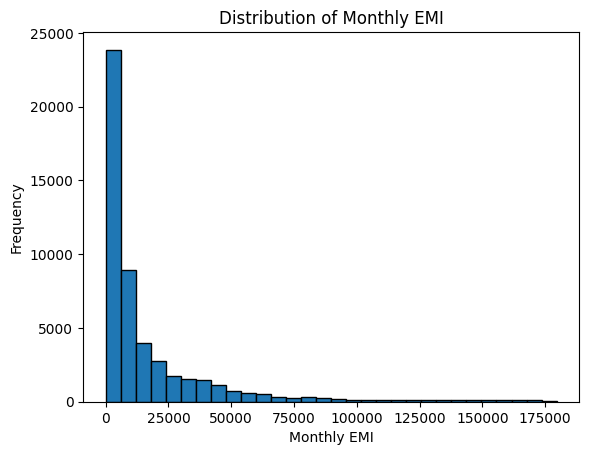

In [ ]:
plt.hist(data_df['monthly_emi'], bins=30, edgecolor='k')
plt.xlabel('Monthly EMI')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly EMI')
plt.show()


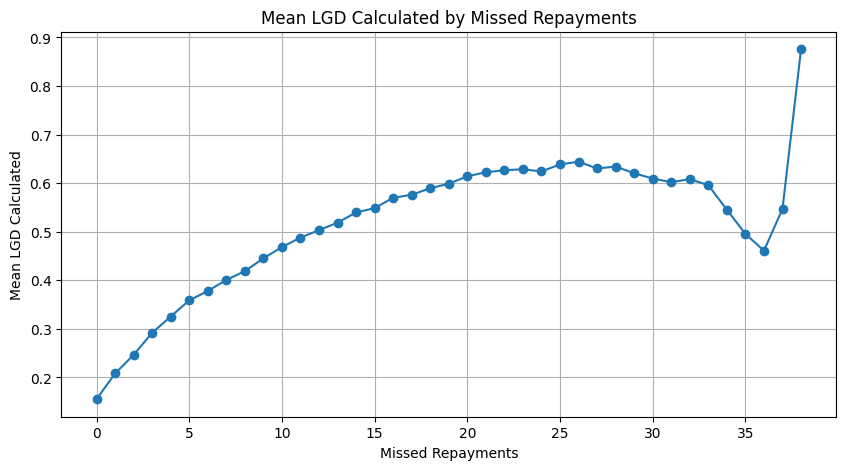

In [ ]:
# Aggregate data
agg_data = data_df.groupby('missed_repayments').agg({'LGD_Calculated': 'mean'}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(agg_data['missed_repayments'], agg_data['LGD_Calculated'], marker='o')
plt.xlabel('Missed Repayments')
plt.ylabel('Mean LGD Calculated')
plt.title('Mean LGD Calculated by Missed Repayments')
plt.grid(True)
plt.show()

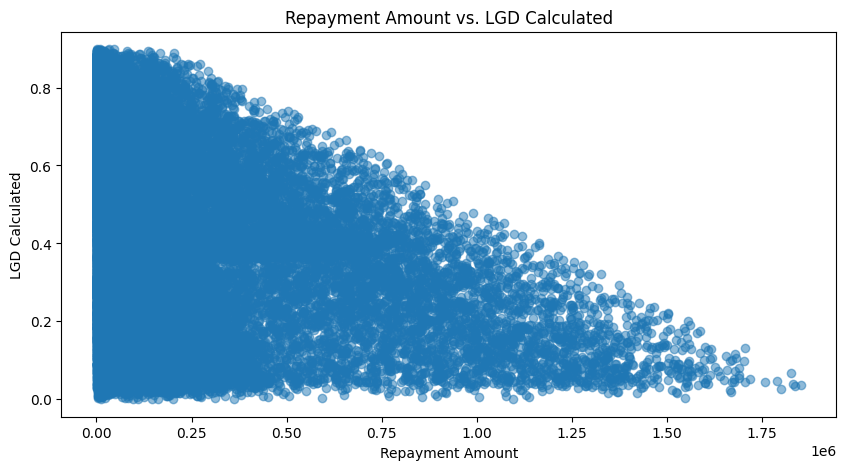

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data_df['repayment_amount'], data_df['LGD_Calculated'], alpha=0.5)
plt.xlabel('Repayment Amount')
plt.ylabel('LGD Calculated')
plt.title('Repayment Amount vs. LGD Calculated')
plt.show()


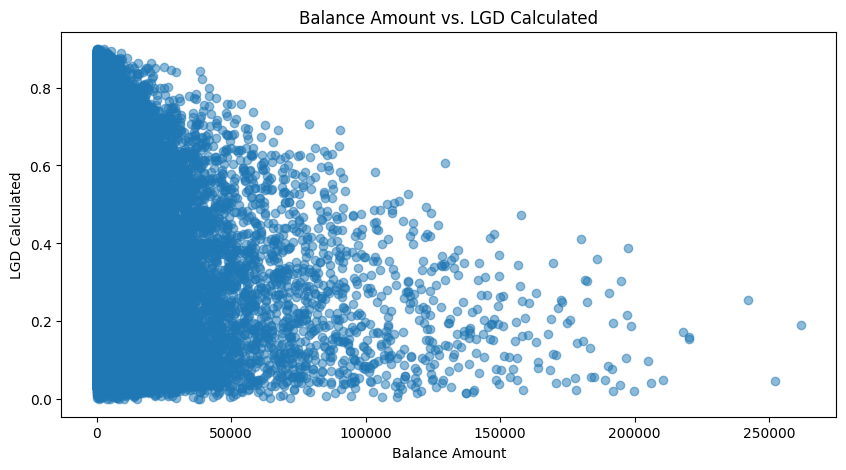

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data_df['balance_amount'], data_df['LGD_Calculated'], alpha=0.5)
plt.xlabel('Balance Amount')
plt.ylabel('LGD Calculated')
plt.title('Balance Amount vs. LGD Calculated')
plt.show()


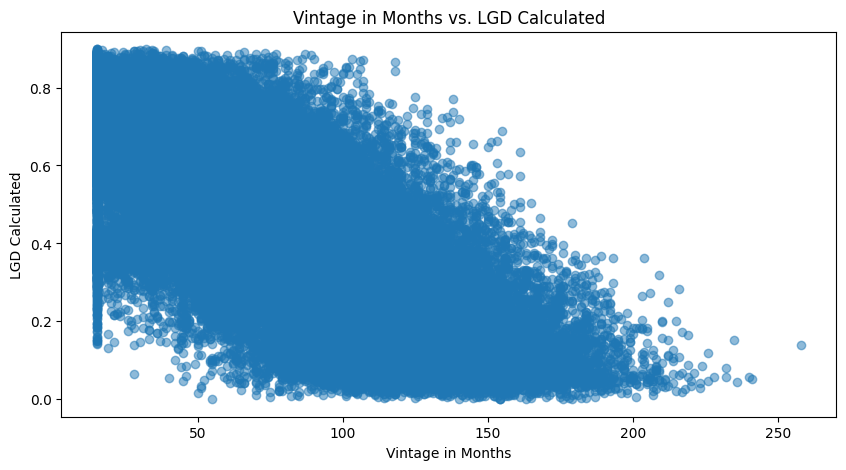

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data_df['vintage_in_months'], data_df['LGD_Calculated'], alpha=0.5)
plt.xlabel('Vintage in Months')
plt.ylabel('LGD Calculated')
plt.title('Vintage in Months vs. LGD Calculated')
plt.show()


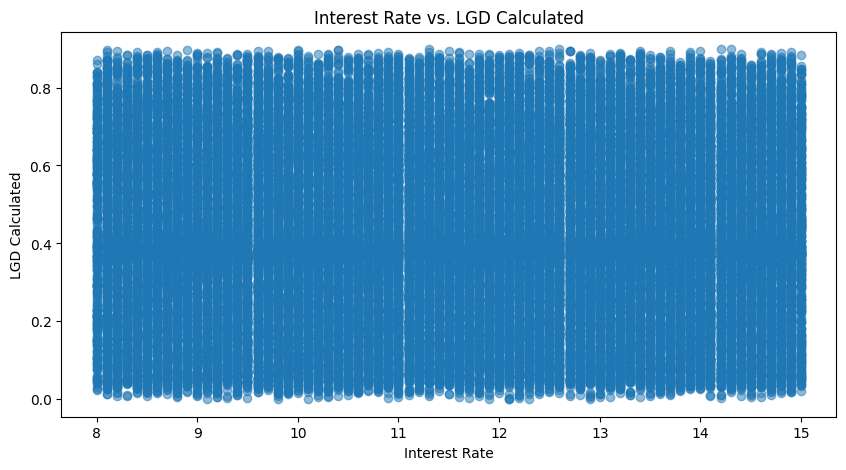

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data_df['interest'], data_df['LGD_Calculated'], alpha=0.5)
plt.xlabel('Interest Rate')
plt.ylabel('LGD Calculated')
plt.title('Interest Rate vs. LGD Calculated')
plt.show()


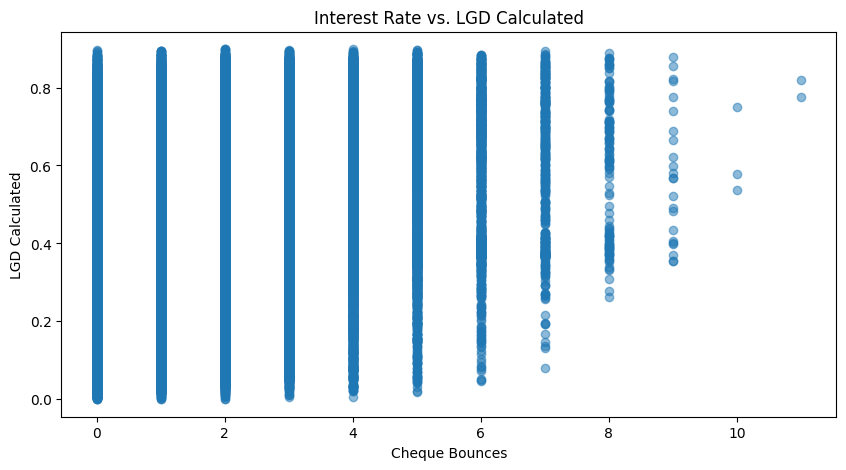

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data_df['cheque_bounces'], data_df['LGD_Calculated'], alpha=0.5)
plt.xlabel('Cheque Bounces')
plt.ylabel('LGD Calculated')
plt.title('Interest Rate vs. LGD Calculated')
plt.show()


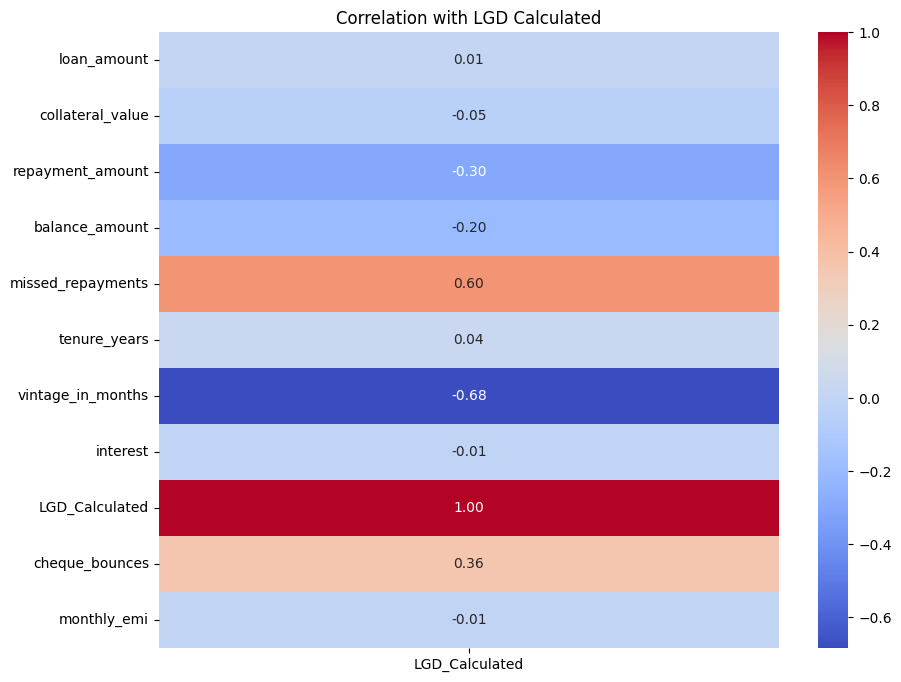

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_df[['loan_amount', 'collateral_value', 'repayment_amount',
                              'balance_amount', 'missed_repayments', 'tenure_years',
                              'vintage_in_months', 'interest', 'LGD_Calculated','cheque_bounces',"monthly_emi"]].corr()
sns.heatmap(correlation_matrix[['LGD_Calculated']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with LGD Calculated')
plt.show()

In [ ]:
status= pd.get_dummies(data_df['loan_type'], drop_first= True)
data_df= pd.concat([data_df,status], axis=1)
data_df= data_df.drop('loan_type', axis=1)
data_df.head()

,loan_acc_num,customer_name,customer_address,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,...,monthly_emi,disbursal_date,default_date,balance_amount,repayment_amount,LGD_Calculated,LGD_Predicted,Consumer-Durable,Personal,Two-Wheeler
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",21916,4929.47,3,0,3,127,2,...,1012.32,2019-04-14,2020-07-31,585.514569,13572.577778,0.155774,0.269852,True,False,False
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",121184,10254.50,1,0,0,156,2,...,5693.24,2015-04-14,2016-07-30,7382.030208,96243.609484,0.121187,0.158201,False,False,True
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,487036,116183.86,0,1,10,22,3,...,16788.02,2015-01-10,2015-04-18,7812.884926,74083.731181,0.609336,0.477461,False,False,False
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",52125,10310.05,5,2,9,30,2,...,2395.69,2018-02-07,2018-09-13,518.081369,21194.059400,0.395605,0.554730,False,False,True
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",8635,1051.25,0,1,3,62,2,...,396.87,2014-12-25,2016-02-20,323.679233,4462.514597,0.361463,0.363337,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data_df, train_size= 0.7, random_state= 100)
print(df_train.shape, df_test.shape)

(34929, 21) (14970, 21)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
num_vars = ['loan_amount', 'collateral_value', 'cheque_bounces',
       'number_of_loans', 'missed_repayments', 'vintage_in_months',
       'tenure_years', 'interest', 'monthly_emi', 'balance_amount',
       'repayment_amount']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [ ]:
df_test.head()

,loan_acc_num,customer_name,customer_address,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,...,monthly_emi,disbursal_date,default_date,balance_amount,repayment_amount,LGD_Calculated,LGD_Predicted,Consumer-Durable,Personal,Two-Wheeler
48308,LN13807197,Shlok Sengupta,"20, Vora Path\nChandrapur 260993",0.126950,0.120064,0.363636,0.500000,0.026316,0.283951,0.00,...,0.125494,2017-04-27,2017-10-31,0.035896,0.048882,0.371494,0.432112,False,False,True
22288,LN75083667,Dharmajan Sood,"H.No. 28, Banerjee\nKarimnagar-355125",0.038853,0.014394,0.000000,0.166667,0.052632,0.716049,0.25,...,0.021058,2014-08-15,2015-12-22,0.010063,0.035172,0.083797,0.166512,False,False,True
34408,LN49502675,Samaira Lad,"65/548, Chand Street\nKharagpur-490335",0.003974,0.004211,0.090909,0.166667,0.184211,0.526749,0.75,...,0.001216,2015-06-06,2017-05-24,0.001040,0.002886,0.212056,0.249128,False,True,False
47378,LN12872924,Mehul Chada,"979\nChada Ganj, Bidar-727833",0.222487,0.131905,0.090909,0.000000,0.000000,0.308642,0.00,...,0.216602,2015-10-30,2016-02-21,0.029798,0.127579,0.301889,0.327716,False,True,False
6990,LN10729063,Ojas Dalal,"92\nGera Ganj, Aurangabad 384592",0.022485,0.021363,0.000000,0.000000,0.078947,0.312757,0.50,...,0.008771,2014-03-19,2015-11-14,0.001703,0.011434,0.283071,0.259213,False,False,True


In [ ]:
X_train= df_train[[ 'loan_amount',
       'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi',  'balance_amount',
       'repayment_amount',
       'Consumer-Durable', 'Personal', 'Two-Wheeler']]
y_train= df_train.pop('LGD_Calculated')


In [ ]:
X_test= df_test[[ 'loan_amount',
       'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi',  'balance_amount',
       'repayment_amount',
       'Consumer-Durable', 'Personal', 'Two-Wheeler']]
y_test= df_test.pop('LGD_Calculated')

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'monthly_emi',
       'balance_amount', 'repayment_amount'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['interest', 'Consumer-Durable', 'Personal', 'Two-Wheeler'], dtype='object')

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_sm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF']= [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by ='VIF', ascending = False)
print(vif)

const                0.404511
loan_amount          0.590194
collateral_value    -0.387845
cheque_bounces       0.076327
number_of_loans      0.146433
missed_repayments    0.475230
vintage_in_months   -0.306846
tenure_years        -0.148942
monthly_emi         -0.050269
balance_amount       0.165482
repayment_amount    -0.837875
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         LGD_Calculated   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     8108.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:47:33   Log-Likelihood:                 23986.
No. Observations:               34929   AIC:                        -4.795e+04
Df Residuals:                   34918   BIC:                        -4.786e+04
Df Model:              

In [ ]:
X_train_log = np.log1p(X_train[col])
X_train_sm = sm.add_constant(X_train_log)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.params)
print(lr_model.summary())
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log.values, i) for i in range(X_train_log.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

const                0.383215
loan_amount          0.936555
collateral_value    -0.535480
cheque_bounces       0.084940
number_of_loans      0.180347
missed_repayments    0.668793
vintage_in_months   -0.332901
tenure_years        -0.233431
monthly_emi         -0.115142
balance_amount       0.299212
repayment_amount    -1.205937
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         LGD_Calculated   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     9047.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:47:34   Log-Likelihood:                 25346.
No. Observations:               34929   AIC:                        -5.067e+04
Df Residuals:                   34918   BIC:                        -5.058e+04
Df Model:              

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Train RMSE: 0.12175282837187262
Test RMSE: 0.12196243046196613


In [ ]:
r2_train = ridge.score(X_train, y_train)
r2_test = ridge.score(X_test, y_test)
print(f"Train R²: {r2_train}")
print(f"Test R²: {r2_test}")

Train R²: 0.6990403188244936
Test R²: 0.6969921277608944


In [ ]:
y_test_binary = (y_test >= 0.5).astype(int)

In [ ]:
X_train

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,balance_amount,repayment_amount,Consumer-Durable,Personal,Two-Wheeler
31737,0.722159,0.640981,0.000000,0.333333,0.184211,0.057613,0.25,0.271429,0.370806,0.028436,0.072755,False,False,False
33671,0.001557,0.000463,0.000000,0.166667,0.368421,0.176955,0.75,0.914286,0.000544,0.000225,0.001208,True,False,False
16976,0.066088,0.005912,0.181818,0.000000,0.000000,0.481481,0.00,0.400000,0.065687,0.045081,0.064828,False,True,False
17349,0.075463,0.027447,0.181818,0.166667,0.184211,0.164609,0.50,0.300000,0.027262,0.007415,0.044674,False,False,True
43562,0.979185,0.611786,0.090909,0.166667,0.421053,0.000000,0.50,0.185714,0.348210,0.059044,0.217080,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16343,0.713670,0.588732,0.000000,0.500000,0.263158,0.168724,0.25,0.442857,0.370869,0.110758,0.072768,False,False,False
79,0.034721,0.012583,0.090909,0.333333,0.368421,0.000000,0.50,0.771429,0.013234,0.001775,0.005256,False,True,False
12145,0.009640,0.000442,0.090909,0.166667,0.184211,0.325103,0.50,0.114286,0.003516,0.001897,0.007538,True,False,False
14180,0.138266,0.116317,0.272727,0.166667,0.184211,0.469136,0.25,0.871429,0.074257,0.027040,0.044746,False,False,True


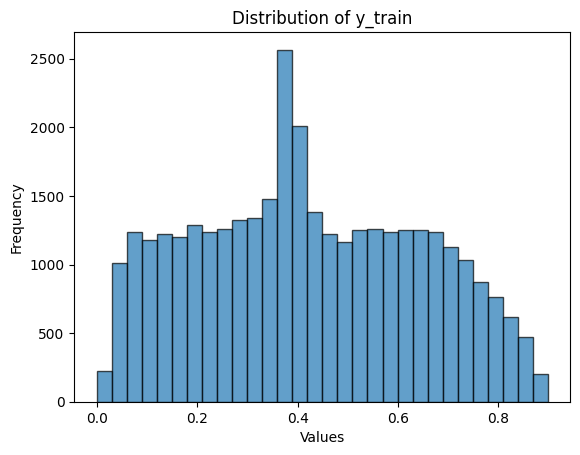

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of y_train
plt.hist(y_train, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of y_train')
plt.show()


In [ ]:
mean_lgd = y_train.mean()
median_lgd = y_train.median()
percentile_25 = y_train.quantile(0.25)
percentile_75 = y_train.quantile(0.75)

print(f'Mean LGD: {mean_lgd}')
print(f'Median LGD: {median_lgd}')
print(f'25th Percentile LGD: {percentile_25}')
print(f'75th Percentile LGD: {percentile_75}')

Mean LGD: 0.42078305881101263
Median LGD: 0.4011459464497676
25th Percentile LGD: 0.2428027547475999
75th Percentile LGD: 0.6014449304822468


In [ ]:
threshold = 0.42
y_train = (y_train >= threshold).astype(int)

In [ ]:
threshold = 0.42
y_test = (y_test >= threshold).astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      8010
           1       0.86      0.86      0.86      6960

    accuracy                           0.87     14970
   macro avg       0.87      0.87      0.87     14970
weighted avg       0.87      0.87      0.87     14970



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
columns_to_drop = ['loan_acc_num', 'customer_name', 'customer_address', 'LGD_Predicted',"disbursal_date","default_date"]
data_df_dt = data_df.drop(columns=columns_to_drop)

In [ ]:
data_df_dt

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,balance_amount,repayment_amount,LGD_Calculated,Consumer-Durable,Personal,Two-Wheeler
0,21916,4929.47,3,0,3,127,2,10.1,1012.32,585.514569,13572.577778,0.155774,True,False,False
1,121184,10254.50,1,0,0,156,2,11.8,5693.24,7382.030208,96243.609484,0.121187,False,False,True
2,487036,116183.86,0,1,10,22,3,14.6,16788.02,7812.884926,74083.731181,0.609336,False,False,False
3,52125,10310.05,5,2,9,30,2,9.6,2395.69,518.081369,21194.059400,0.395605,False,False,True
4,8635,1051.25,0,1,3,62,2,9.6,396.87,323.679233,4462.514597,0.361463,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222483,43088.19,2,2,8,42,2,9.6,10225.44,4512.206729,30676.320000,0.668449,False,False,True
49996,104051,8666.54,6,2,9,86,3,12.6,3485.88,1501.418836,38421.067071,0.547456,False,False,True
49997,51767,4101.24,1,0,4,156,2,14.0,2485.48,2910.573780,43784.343005,0.074979,False,False,True
49998,77869,10652.77,0,0,5,84,2,14.9,3771.91,4152.068124,52305.658537,0.191483,False,False,True


In [ ]:
scaler= MinMaxScaler()
num_vars = ['loan_amount', 'collateral_value', 'cheque_bounces',
       'number_of_loans', 'missed_repayments', 'vintage_in_months',
       'tenure_years', 'interest', 'monthly_emi', 'balance_amount',
       'repayment_amount']

data_df_dt[num_vars]=scaler.fit_transform(data_df_dt[num_vars])

In [ ]:
data_df_dt

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,balance_amount,repayment_amount,LGD_Calculated,Consumer-Durable,Personal,Two-Wheeler
0,0.009968,0.008319,0.272727,0.000000,0.078947,0.460905,0.25,0.300000,0.005403,0.002236,0.007300,0.155774,True,False,False
1,0.059652,0.017306,0.090909,0.000000,0.000000,0.580247,0.25,0.542857,0.031484,0.028197,0.051938,0.121187,False,False,True
2,0.242762,0.196076,0.000000,0.166667,0.263158,0.028807,0.50,0.942857,0.093301,0.029843,0.039973,0.609336,False,False,False
3,0.025088,0.017399,0.454545,0.333333,0.236842,0.061728,0.25,0.228571,0.013111,0.001979,0.011415,0.395605,False,False,True
4,0.003321,0.001774,0.000000,0.166667,0.078947,0.193416,0.25,0.228571,0.001974,0.001236,0.002381,0.361463,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.110352,0.072717,0.181818,0.333333,0.210526,0.111111,0.25,0.228571,0.056736,0.017235,0.016535,0.668449,False,False,True
49996,0.051077,0.014626,0.545455,0.333333,0.236842,0.292181,0.50,0.657143,0.019185,0.005735,0.020717,0.547456,False,False,True
49997,0.024909,0.006921,0.090909,0.000000,0.105263,0.580247,0.25,0.857143,0.013611,0.011117,0.023613,0.074979,False,False,True
49998,0.037973,0.017978,0.000000,0.000000,0.131579,0.283951,0.25,0.985714,0.020779,0.015859,0.028214,0.191483,False,False,True


In [ ]:
data_df_dt.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'balance_amount', 'repayment_amount', 'LGD_Calculated',
       'Consumer-Durable', 'Personal', 'Two-Wheeler'],
      dtype='object')

In [ ]:
X = data_df_dt[['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'balance_amount', 'repayment_amount',
       'Consumer-Durable', 'Personal', 'Two-Wheeler']]
y = data_df_dt['LGD_Calculated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
threshold = 0.42
y_train = (y_train >= threshold).astype(int)
y_test = (y_test >= threshold).astype(int)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      5355
           1       0.90      0.89      0.90      4625

    accuracy                           0.91      9980
   macro avg       0.91      0.91      0.91      9980
weighted avg       0.91      0.91      0.91      9980



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5355
           1       0.94      0.92      0.93      4625

    accuracy                           0.93      9980
   macro avg       0.93      0.93      0.93      9980
weighted avg       0.93      0.93      0.93      9980



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:

ada_clf.fit(X_train, y_train)
y_pred_ad = ada_clf.predict(X_test)
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ad))

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5355
           1       0.87      0.88      0.88      4625

    accuracy                           0.88      9980
   macro avg       0.88      0.88      0.88      9980
weighted avg       0.88      0.88      0.88      9980



In [ ]:
# Initialize and train the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5355
           1       0.96      0.95      0.95      4625

    accuracy                           0.96      9980
   macro avg       0.96      0.96      0.96      9980
weighted avg       0.96      0.96      0.96      9980



In [ ]:
# Initialize and train the LightGBM classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_clf.fit(X_train, y_train)
y_pred_lgb = lgb_clf.predict(X_test)
print("LightGBM Classification Report:")

print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 18637, number of negative: 21282
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1617
[LightGBM] [Info] Number of data points in the train set: 39919, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466870 -> initscore=-0.132713
[LightGBM] [Info] Start training from score -0.132713
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5355
           1       0.97      0.95      0.96      4625

    accuracy                           0.96      9980
   macro avg       0.96      0.96      0.96      9980
weighted avg       0.96      0.96      0.96      9980



In [ ]:
# Initialize and train the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      5355
           1       0.88      0.90      0.89      4625

    accuracy                           0.90      9980
   macro avg       0.90      0.90      0.90      9980
weighted avg       0.90      0.90      0.90      9980



In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      5355
           1       0.86      0.93      0.90      4625

    accuracy                           0.90      9980
   macro avg       0.90      0.90      0.90      9980
weighted avg       0.90      0.90      0.90      9980



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      5355
           1       0.80      0.86      0.83      4625

    accuracy                           0.84      9980
   macro avg       0.84      0.84      0.84      9980
weighted avg       0.84      0.84      0.84      9980



In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
feature_columns = ['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'balance_amount', 'repayment_amount',
       'Consumer-Durable', 'Personal', 'Two-Wheeler']
target_column = 'LGD_Calculated'

In [ ]:
data_df

,loan_acc_num,customer_name,customer_address,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,...,monthly_emi,disbursal_date,default_date,balance_amount,repayment_amount,LGD_Calculated,LGD_Predicted,Consumer-Durable,Personal,Two-Wheeler
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",21916,4929.47,3,0,3,127,2,...,1012.32,2019-04-14,2020-07-31,585.514569,13572.577778,0.155774,0.269852,True,False,False
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",121184,10254.50,1,0,0,156,2,...,5693.24,2015-04-14,2016-07-30,7382.030208,96243.609484,0.121187,0.158201,False,False,True
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,487036,116183.86,0,1,10,22,3,...,16788.02,2015-01-10,2015-04-18,7812.884926,74083.731181,0.609336,0.477461,False,False,False
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",52125,10310.05,5,2,9,30,2,...,2395.69,2018-02-07,2018-09-13,518.081369,21194.059400,0.395605,0.554730,False,False,True
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",8635,1051.25,0,1,3,62,2,...,396.87,2014-12-25,2016-02-20,323.679233,4462.514597,0.361463,0.363337,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,LN82044693,Urvi Mannan,81\nDey Nagar\nPhagwara-163985,222483,43088.19,2,2,8,42,2,...,10225.44,2021-02-03,2022-01-24,4512.206729,30676.320000,0.668449,0.507812,False,False,True
49996,LN37968463,Yasmin Tailor,"45/573, Kakar Path\nBathinda 988155",104051,8666.54,6,2,9,86,3,...,3485.88,2013-01-12,2014-04-06,1501.418836,38421.067071,0.547456,0.449310,False,False,True
49997,LN87152445,Kaira Chandran,36/99\nGokhale Circle\nDeoghar 359508,51767,4101.24,1,0,4,156,2,...,2485.48,2016-05-01,2017-02-05,2910.573780,43784.343005,0.074979,0.221565,False,False,True
49998,LN74765572,Kashvi Toor,"69/60\nRege Nagar, New Delhi 735977",77869,10652.77,0,0,5,84,2,...,3771.91,2013-08-29,2014-10-01,4152.068124,52305.658537,0.191483,0.324069,False,False,True


In [ ]:
X = data_df[feature_columns].values
y = data_df[target_column].values.reshape(-1, 1)

In [ ]:
X

array([[21916, 4929.47, 3, ..., True, False, False],
       [121184, 10254.5, 1, ..., False, False, True],
       [487036, 116183.86, 0, ..., False, False, False],
       ...,
       [51767, 4101.24, 1, ..., False, False, True],
       [77869, 10652.77, 0, ..., False, False, True],
       [241857, 59258.17, 0, ..., False, False, True]], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [ ]:
from tensorflow.keras.callbacks import Callback
class StopOnLowLoss(Callback):
    def __init__(self, threshold):
        super(StopOnLowLoss, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('loss') < self.threshold:
            print(f"\nStopping training as loss has dropped below {self.threshold}.")
            self.model.stop_training = True


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
stop_on_low_loss = StopOnLowLoss(threshold=0.01)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[stop_on_low_loss],
    verbose=1
)

Epoch 1/50
1123/1123 [==============================] - 4s 3ms/step - loss: 0.0177 - val_loss: 0.0104
Epoch 2/50
1103/1123 [============================>.] - ETA: 0s - loss: 0.0079
Stopping training as loss has dropped below 0.01.
1123/1123 [==============================] - 2s 2ms/step - loss: 0.0079 - val_loss: 0.0070


In [ ]:
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')
predictions = model.predict(X_test)
print(f'Predictions: {predictions[:5]}')

312/312 [==============================] - 1s 2ms/step - loss: 0.0068
Test Loss: 0.006802181713283062
312/312 [==============================] - 1s 1ms/step
Predictions: [[0.21172236]
 [0.6107388 ]
 [0.26312447]
 [0.7927474 ]
 [0.5684166 ]]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_test_flat = y_test
y_pred_flat = predictions.flatten()
mae = mean_absolute_error(y_test_flat, y_pred_flat)
mse = mean_squared_error(y_test_flat, y_pred_flat)
r2 = r2_score(y_test_flat, y_pred_flat)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.05708085000514984
Mean Squared Error (MSE): 0.006802182178944349
R-squared (R2): 0.8622673651312007


In [ ]:
! gdown --id 10YS2Cmj3i7GOR4vyWhiUG2ntkFyN0Guw

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10YS2Cmj3i7GOR4vyWhiUG2ntkFyN0Guw
To: /content/test_main_loan_base.csv
100% 1.34M/1.34M [00:00<00:00, 118MB/s]


In [ ]:
! gdown --id 1rSZYraCeCij6iAUTM_e22CAVGBKu6plV

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rSZYraCeCij6iAUTM_e22CAVGBKu6plV
To: /content/test_monthly_balance_base.csv
100% 32.4M/32.4M [00:00<00:00, 35.0MB/s]


In [ ]:
! gdown --id 1drVi2E0QSXLTV65HhfTTTQ67GmY1B_nv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1drVi2E0QSXLTV65HhfTTTQ67GmY1B_nv
To: /content/test_repayment_base.csv
100% 3.97M/3.97M [00:00<00:00, 157MB/s]


In [ ]:
main_df_tst = pd.read_csv('/content/test_main_loan_base.csv')
monthly_balance_df_tst = pd.read_csv('/content/test_monthly_balance_base.csv')
repayment_df_tst = pd.read_csv('/content/test_repayment_base.csv')

In [ ]:
repayment_df_tst_1= repayment_df_tst.groupby(["loan_acc_num"]).sum(["repayment_amount"])
repayment_df_tst_1.reset_index(inplace =True)

monthly_balance_df_tst_1= monthly_balance_df_tst.groupby(["loan_acc_num"]).mean(["balance_amount"])
monthly_balance_df_tst_1.reset_index(inplace =True)

In [ ]:
data_df_tst = main_df_tst.merge(monthly_balance_df_tst_1, on='loan_acc_num', how='left') \
                 .merge(repayment_df_tst_1, on='loan_acc_num', how='left')

In [ ]:
data_df_out=data_df_tst.copy()

In [ ]:
data_df_tst.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
balance_amount        57
repayment_amount     768
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
features = ['loan_amount', 'collateral_value']
target = 'repayment_amount'
non_missing_data = data_df_tst[data_df_tst[target].notna()]
missing_data = data_df_tst[data_df_tst[target].isna()]
X_train = non_missing_data[features]
y_train = non_missing_data[target]
X_missing = missing_data[features]
model = LinearRegression()
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)
data_df_tst.loc[data_df_tst[target].isna(), target] = predicted_values

In [ ]:
target = 'balance_amount'
non_missing_data = data_df_tst[data_df_tst[target].notna()]
missing_data = data_df_tst[data_df_tst[target].isna()]
X_train = non_missing_data[features]
y_train = non_missing_data[target]
X_missing = missing_data[features]
model = LinearRegression()
model.fit(X_train, y_train)
predicted_values = model.predict(X_missing)
data_df_tst.loc[data_df_tst[target].isna(), target] = predicted_values

In [ ]:
data_df_tst.isnull().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
balance_amount       0
repayment_amount     0
dtype: int64

In [ ]:
data_df_tst.columns

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'disbursal_date', 'default_date', 'balance_amount',
       'repayment_amount'],
      dtype='object')

In [ ]:
status= pd.get_dummies(data_df_tst['loan_type'], drop_first= True)
data_df_tst= pd.concat([data_df_tst,status], axis=1)
data_df_tst= data_df_tst.drop('loan_type', axis=1)
data_df_tst.head()

,loan_acc_num,customer_name,customer_address,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,balance_amount,repayment_amount,Consumer-Durable,Personal,Two-Wheeler
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,26560.585984,675861.052902,False,False,False
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,80.712017,2208.645810,True,False,False
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,15501.249720,111812.520000,False,False,False
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,2806.721974,18310.580000,False,False,True
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,673.018752,3428.641165,True,False,False


In [ ]:
data_df_tst= data_df_tst[[ 'loan_amount',
       'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi',  'balance_amount',
       'repayment_amount',
       'Consumer-Durable', 'Personal', 'Two-Wheeler']]

In [ ]:
scaler= MinMaxScaler()
num_vars = ['loan_amount', 'collateral_value', 'cheque_bounces',
       'number_of_loans', 'missed_repayments', 'vintage_in_months',
       'tenure_years', 'interest', 'monthly_emi', 'balance_amount',
       'repayment_amount']

data_df_tst[num_vars]=scaler.fit_transform(data_df_tst[num_vars])

In [ ]:
data_df_tst

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,balance_amount,repayment_amount,Consumer-Durable,Personal,Two-Wheeler
0,0.629557,0.017218,0.3,0.166667,0.142857,0.400000,0.00,0.585714,0.630498,0.119101,0.381233,False,False,False
1,0.009877,0.003909,0.0,0.500000,0.742857,0.109091,1.00,0.600000,0.002480,0.000355,0.001208,True,False,False
2,0.102994,0.014047,0.1,0.333333,0.000000,0.218182,0.00,0.842857,0.104764,0.069506,0.063039,False,False,False
3,0.095917,0.044691,0.4,0.500000,0.342857,0.000000,0.25,0.642857,0.051338,0.012579,0.010292,False,False,True
4,0.001989,0.002774,0.1,0.166667,0.000000,0.622727,0.00,0.942857,0.002779,0.003011,0.001896,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.193905,0.196740,0.1,0.000000,0.228571,0.418182,0.75,0.085714,0.053907,0.016478,0.098640,False,True,False
9996,0.075750,0.040482,0.2,0.333333,0.171429,0.204545,0.00,0.857143,0.077292,0.015661,0.007725,False,False,True
9997,0.004351,0.001619,0.0,0.166667,0.057143,0.668182,0.75,0.128571,0.001241,0.001063,0.005142,True,False,False
9998,0.003094,0.002466,0.0,0.166667,0.142857,0.554545,0.50,0.857143,0.001320,0.001481,0.002942,True,False,False


In [ ]:
# Initialize and train the XGBoost classifier
print("XGBoost Prediction")
y_pred_xgb_tst = xgb_clf.predict(data_df_tst)

XGBoost Prediction


In [ ]:
y_pred_xgb_tst

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
data_df_out["LGD_Predicted"]=y_pred_xgb_tst

In [ ]:
data_df_out.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,balance_amount,repayment_amount,LGD_Predicted
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,26560.585984,675861.052902,0
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,80.712017,2208.645810,1
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,15501.249720,111812.520000,0
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,2806.721974,18310.580000,1
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,673.018752,3428.641165,0
